In [1]:
import json
import urllib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genextreme as gev
import scipy.stats as stats
import pandas as pd
import datetime

In [2]:
county='WashDC'
#county='Baltimore_'

In [3]:
# Hard Code params with proper names
# at the
params_dict = {'42101': 'CarbonMonoxide', 
               '42401': 'SulfurDioxide', 
               '42602': 'NitrogenDioxide', 
               '44201': 'Ozone', 
               '88101': 'PM2.5LocalConditions'}
params_units = {'42101': 'Parts per million', 
                '42401': 'Parts per billion', 
                '42602': 'Parts per billion', 
                '44201': 'Parts per million', 
                '88101': 'Micrograms/cubic meter (LC)'}

In [4]:
def readAndDisplayFile(c,p,y):
    f_name = '../Anjali/data/'+c+p+'_'+y+'.json'
    #print(f_name)
    with open(f_name) as json_file:
        data = json.load(json_file)
        #print(data)
        df = pd.DataFrame.from_dict(data['Data'])
        #print(df.columns)
        if (df.size != 0) :
            # get only the needed cols out of 30+ columns
            df = df[['date_local','arithmetic_mean','units_of_measure']]

            # agggregate by date so that we have one value per day
            df = df.groupby('date_local').mean().reset_index()
        return df;
def readAndDisplayFileYearRange(c,px,ya,yb):
    #print(c,px,ya,yb)
    # Create Empty DF
    df_ab = pd.DataFrame()
    for y in range(ya,yb):
        df1 = readAndDisplayFile(c,px,str(y));
        df_ab = df_ab.append(df1,ignore_index=True)
    return df_ab

C:\Users\ksama_3n8exwu\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in add
  -pex2+logpex2-logex2)


(-0.5015819929550804, 2.9961353779587996, 1.0017480841258783)
(-0.5068603659863826, 2.999161708806385, 1.0305462704015094)
(-0.06814331241400648, 10.064278600874225, 4.7022244789603755)
(-0.6526722226629056, 3.621057873973146, 3.902134995832234e-30)
(-0.05701049848342438, 7.44172970514134, 3.498645405332815)


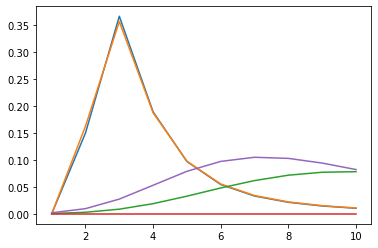

In [5]:
for p in params_dict.keys():
    df_10 = readAndDisplayFileYearRange(county,p,2010,2020)
    dataN = df_10['arithmetic_mean'].tolist()
    t = np.linspace(1,10,10)
    fit = gev.fit(dataN,loc=3)
    pdf = gev.pdf(t, *fit)
    plt.plot(t, pdf)
    #plt.plot(t, dataN, "o")
    print(fit)

-0.21315236735575757 0.36195514423654107 0.15611247138349693


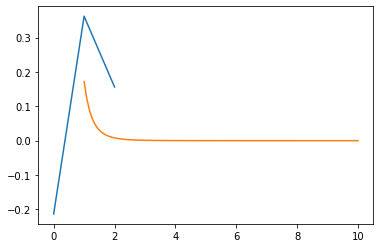

In [6]:
p='42101'
df_10 = readAndDisplayFileYearRange(county,p,2010,2020)
dataN = df_10['arithmetic_mean'].tolist()
t = np.linspace(1,10,100)
shape, loc, scale = gev.fit(dataN,loc=0)
fit = gev.fit(dataN,loc=0)
plt.plot(fit)
print(shape, loc, scale)
pdf = gev.pdf(t, *fit)
plt.plot(t, pdf)

In [7]:
df_temp  = pd.read_csv('cp_temperature.csv')

In [8]:
ann_max = df_temp.TMAX.to_list()
gev.fit(ann_max,loc=0)

C:\Users\ksama_3n8exwu\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:2402: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


(0.1587461061590093, 0.001650659012725386, 0.3172971578207583)

In [27]:
fatigue = [726000,615000,508000,808000,755000,849000,384000,667000,515000,483000]

In [72]:
p='42101' # CO
p='44201'  # NO
df = readAndDisplayFileYearRange(county,p,2001,2020)
dataN = df['arithmetic_mean'].tolist()
    

In [95]:
# Find max in each year and use R to find the fit
# fit gives, the probability of those maximum values could occur
import datetime as dt
x = []
df['date_local'] = pd.to_datetime(df['date_local'])
for y in range(2001,2020):
    df_y = df[df['date_local'].dt.year == y]
    for m in range(1,13):
        x.append(np.max(df_y[df_y['date_local'].dt.month == m].arithmetic_mean.tolist()))
x

[0.01785566666666667,
 0.0256305,
 0.03153741666666667,
 0.037628,
 0.04607366666666666,
 0.06179666666666667,
 0.052434249999999995,
 0.058583249999999996,
 0.041731833333333336,
 0.036838333333333334,
 0.021396750000000003,
 0.019041166666666668,
 0.020026000000000002,
 0.030466416666666673,
 0.03607775,
 0.037953916666666664,
 0.051603333333333334,
 0.06735208333333333,
 0.07410341666666666,
 0.07239924999999998,
 0.04933733333333332,
 0.03860966666666667,
 0.026809250000000003,
 0.023829999999999994,
 0.0245025,
 0.027966500000000002,
 0.03713275,
 0.045505333333333335,
 0.040527333333333325,
 0.06410499999999998,
 0.047795333333333336,
 0.04132883333333333,
 0.03392891666666666,
 0.027010833333333335,
 0.025859916666666666,
 0.024546166666666664,
 0.0246,
 0.027493166666666662,
 0.0291675,
 0.05057116666666667,
 0.049206,
 0.04259974999999999,
 0.055591333333333326,
 0.04575058333333334,
 0.03001266666666667,
 0.025530916666666667,
 0.02437241666666667,
 0.021524666666666664,
 0.0

In [23]:
import math
location= 0.03505181  #(mu)
scale=0.01056331       #(sigma)
shape= -0.14179238    # (epsilon)
params = '1.4292595  0.4741425 -0.1274433'
(location, scale, shape) = [float(x) for x in params.split()]
x=0.06319148936
p = 1- math.exp(-(1 + shape * (( x - location )/scale)) ** (-1/shape))
p
1/p

1.0000088484940965

In [21]:
params = '1.4292595  0.4741425 -0.1274433'


In [22]:
location

1.4292595